In [15]:
# import libraries
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math as m

# built-in statistics functions
from statistics import variance
from scipy.stats import mode

#plotting
plt.rcParams.update({'font.size': 16})

**Exercise 7.1**

In [16]:
# load data
iris = pd.read_excel('./iris.xlsx')
iris

,Petal Width (cm),Petal Length (cm),Sepal Width (cm),Sepal Length (cm),Class
0,2,14,33,50,0
1,24,56,31,67,1
2,23,51,31,69,1
3,2,10,36,46,0
4,20,52,30,65,1
...,...,...,...,...,...
145,20,50,25,57,1
146,13,40,23,55,2
147,2,17,34,54,0
148,24,51,28,58,1


In [17]:
# randomly shuffling the dataset rows and separating into 80% training, 20% test
# and convert to numpy matrices for better computation
N = len(iris)
iris = iris.sample(frac=1).reset_index(drop=True)
training = iris[:int(N*0.8)].to_numpy()
validation = iris[int(N*0.8):].to_numpy()

In [22]:
def KNN(test, training, K):
    # function which tests test data against training data using a K nearest neighbours algorithm
    # assuming classes of test and training lie in their final column
    correct_classes = test[:,-1]
    
    # data lengths
    ntrain = len(training)
    nvalid = len(test)

    for i in range(nvalid):
        # arbitrary distances and classes to preliminary assign to test data
        dists = 1000*np.ones(K)
        cs = -1*np.ones(K)
        test[i,-1] = -1

        for j in range(ntrain):
            # compute distance to each training point
            dtrial = la.norm(test[i,:-1] - training[j,:-1])
            
            if dtrial < dists.max():
                # if we find a new nearest neighbour we add its distance and class to vote
                dists[np.argmax(dists)] = dtrial
                cs[np.argmax(dists)] = training[j,-1]
        
        # assign class of test data to mode class of K nearest neighbours
        test[i,-1] = mode(cs)[0]
    
    # proportion of correct classifications
    return 1 - np.count_nonzero(test[:,-1] - correct_classes)/nvalid

In [23]:
# test case
KNN(validation, training, 1)

1.0

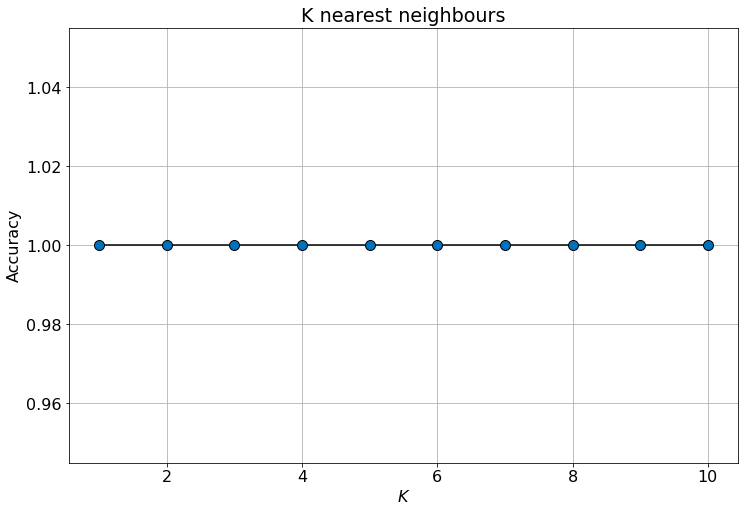

In [6]:
# KNN for K = 1, ..., 10
K = 10
accuracies = np.zeros(K+1)
for ks in range(1,K+1):
    accuracies[ks] = KNN(validation, training, ks)

# plotting
fig = plt.figure(figsize=(12,8))

plt.plot(range(1,K+1), accuracies[1:], '-ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.title('K nearest neighbours')
plt.grid()

rescaling the data columns to lie in [0,1] and repeating the above code

In [7]:
# reload data
iris = pd.read_excel('./iris.xlsx',dtype='float64')
iris = iris.to_numpy()

In [8]:
# rescaling data columns
N = len(iris)
for l in range(4):
    iris[:,l] = iris[:,l]/iris[:,l].max()

In [9]:
# randomly shuffling the dataset rows and separating into 80% training, 20% test
# and convert to numpy matrices for better computation
np.random.shuffle(iris)
training = iris[:int(N*0.8)]
validation = iris[int(N*0.8):]

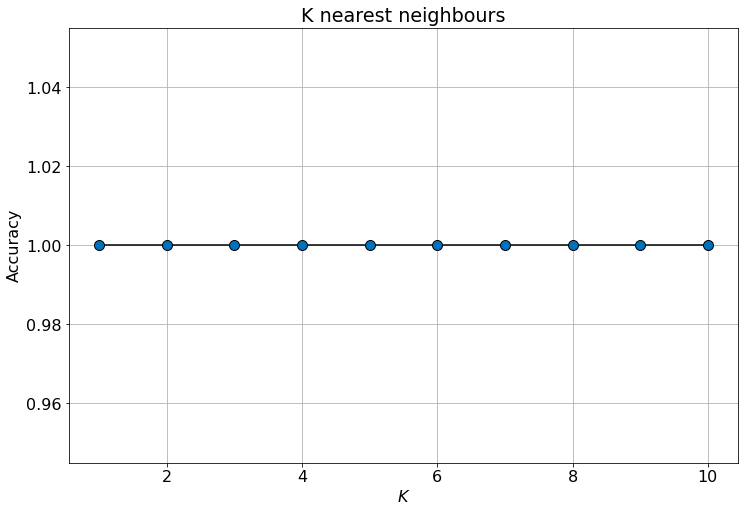

In [11]:
# KNN for K = 1, ..., 10
K = 10
accuracies = np.zeros(K+1)
for ks in range(1,K+1):
    accuracies[ks] = KNN(validation, training, ks)

# plotting
fig = plt.figure(figsize=(12,8))

plt.plot(range(1,K+1), accuracies[1:], '-ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.title('K nearest neighbours')
plt.grid()

I guess my K nearest neighbours is too good or I'm going wrong somewhere...

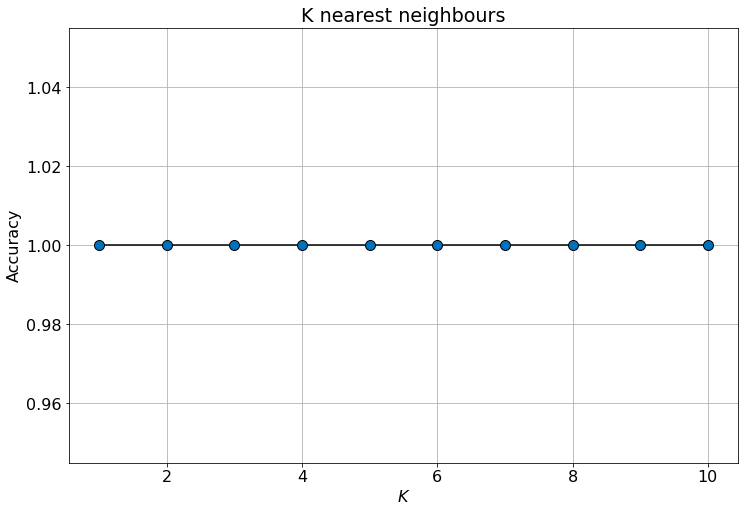

In [12]:
# redefining function to only use one attribute for distance measure
def KNNselective(test, training, K, attribute):
    correct_classes = test[:,-1]

    ntrain = len(training)
    nvalid = len(test)

    for i in range(nvalid):
        dists = 100000*np.ones(K)
        cs = -1*np.ones(K)
        test[i,-1] = -1
        
        for j in range(ntrain):
            dtrial = np.sqrt((test[i,attribute] - training[j,attribute])**2)
            
            if dtrial < dists.max():
                dists[np.argmax(dists)] = dtrial
                cs[np.argmax(dists)] = training[j,-1]
    
        test[i,-1] = mode(cs)[0]

    return 1 - np.count_nonzero(test[:,-1] - correct_classes)/nvalid

# KNN for K = 1, ..., 10
K = 10
accuracies = np.zeros(K+1)
for ks in range(1,K+1):
    accuracies[ks] = KNNselective(validation, training, ks, 3)

# plotting
fig = plt.figure(figsize=(12,8))

plt.plot(range(1,K+1), accuracies[1:], '-ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.title('K nearest neighbours')
plt.grid()

**Exercise 7.2**